In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Исследовательский анализ данных

## 1. Словестное описание признаков

macro.csv
- timestamp : дата, на которую актуальны макроэкономические показатели
- salary : средняя зарплата в регионе
- fixed_basket: стоимость потребительской корзины
- rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса
- rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса
- rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса
- average_life_exp: средняя продолжительность жизни в регионе

train.csv
- id: id транзакции
- timestamp: дата продажи
- full_sq: общая площадь
- life_sq: жилая площадь
- floor: этаж
- state: жилищные условия
- max_floor: количество этажей в здании
- material: материал, из которого изговолены стены
- build_year: год строительства
- num_room: количество жилых комнат
- kitch_sq: площадь кухни
- full_all: количество населения в регионе
- sub_area: название территории
- price_doc: цена квартиры

## 2. Загрузка данных и общее описание набора

In [ ]:
!mkdir /root/.kaggle
import json
kaggle = {"username":"balabasofya1","key":"59b90ae4667bfd821f4a3e2625ff92dd"}
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle, f)

!chmod 600 /root/.kaggle/kaggle.json
#Загружаем данные выбранного соревнования
!kaggle competitions download -c mlurfuflat

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mlurfuflat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -u mlurfuflat.zip

Archive:  mlurfuflat.zip


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
macro = pd.read_csv('macro.csv')
train_c = train.copy()
train_macro = train.merge(macro, how='left', on='timestamp')
train_macro
train

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000


In [ ]:
test_clean = test.copy()

In [ ]:
train.loc[train["life_sq"] + train["kitch_sq"] > train["full_sq"], "full_sq"] = np.nan
train.loc[train["full_sq"] == 0, "full_sq"] = np.nan
print('Максимальная площадь помещений: {0}; Минимальная площадь помещений: {1}.'.format(train.full_sq.max(), train.full_sq.min()))

Максимальная площадь помещений: 5326.0; Минимальная площадь помещений: 12.0.


In [ ]:
noKitchen = len(train[train["kitch_sq"] == 0])
print('Всего',noKitchen, 'жилых помещений без кухни.')

Всего 471 жилых помещений без кухни.


Избавляемся от ошибочных данных в full_sq, и получаем, минимальную и максимальную площадь помещений.

Также количество помещений в которых отсутствует кухня.

In [ ]:
train.loc[(train["max_floor"] >= 25) & (train["build_year"] < '1990'), 'max_floor'] = np.nan
train.loc[(train["max_floor"] == 0), 'max_floor'] = np.nan
train.loc[train["floor"] > train["max_floor"], 'floor'] = np.nan
maxFloor = train.max_floor.max()
minFloor = train.max_floor.min()
maxApartF = train.loc[train['max_floor'] == maxFloor].iloc[0]['floor']
minApartF = train.loc[train['max_floor'] == minFloor].iloc[0]['floor']
print('Самое высокое здание: {0} этажей, с помещениями на {1} этаже; Самое низкое здание: {2} этаж, с помещениями на {3} этаже'.format(maxFloor, maxApartF, minFloor, minApartF))

Самое высокое здание: 57.0 этажей, с помещениями на 9.0 этаже; Самое низкое здание: 1.0 этаж, с помещениями на 1.0 этаже


In [ ]:
meanFloor = train['max_floor'].mean().round(0)
meanApartF = train['floor'].mean().round(0)
print('Средняя высота зданий', meanFloor, 'этажей. Средний этаж помещений', meanApartF)

Средняя высота зданий 13.0 этажей. Средний этаж помещений 7.0


Избавляемся от ошибочных данных в max_floor в соответствии с этажностью и годами постройки, и floor в соответсвии с отношением этажа помещения и этажа здания.

In [ ]:
train.loc[train["build_year"] < '1500.0', 'build_year'] = np.nan
train.loc[train["build_year"] > '2023.0', 'build_year'] = np.nan
train.loc[train["build_year"] == '20.0', 'build_year'] = np.nan
train.loc[train["build_year"] == '20052009.0', 'build_year'] = np.nan
train.loc[train["state"] > 4, 'state'] = np.nan
train["build_year"] = train["build_year"].astype (float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     13878 non-null  float64
 3   life_sq     13828 non-null  float64
 4   floor       14637 non-null  float64
 5   state       12365 non-null  float64
 6   max_floor   13759 non-null  float64
 7   material    13938 non-null  float64
 8   build_year  12758 non-null  float64
 9   num_room    13938 non-null  float64
 10  kitch_sq    13938 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
train.material.value_counts()

1.0    9012
2.0    2285
5.0    1261
4.0     870
6.0     509
3.0       1
Name: material, dtype: int64

Самым популярным материалом для постройки является номер 1.0 и состовляет 9012 помещений. Самый редкий же материал номер 3.0, встречается всего 1 раз.

Также заметен большой разрыв между частотой 1 и 2 материала.

In [ ]:
priceF = train.loc[train['material'] == 1, 'price_doc'].mean().round(1)
priceS = train.loc[train['material'] == 3, 'price_doc'].mean().round(1)
print('Средняя стоимость помещений из самого популярного материала', priceF, 'Из самого редкого', priceS)

Средняя стоимость помещений из самого популярного материала 7253526.2 Из самого редкого 6931143.0


In [ ]:
train.num_room.value_counts()

2.0     5445
1.0     4910
3.0     3231
4.0      304
5.0       27
6.0        7
0.0        7
10.0       2
8.0        2
17.0       1
19.0       1
9.0        1
Name: num_room, dtype: int64

Самые часто продоваемые помещения являются 2-х комнатными, далее идут 1 комнатные. Реже всего встречаются 9-ти 17-ти и 19-ти комнатные, все по одному разу. Также заметен крупный разрыв между количеством 3-х комнатных и 4-х комнатных, в 10,62 раза 3-х комнатных помещений больше.

In [ ]:
ex = train.loc[train['price_doc'] == train.price_doc.max()]
print('Стоимость самого дорогого помещения: {0}, материал: {1}, количество комнат: {2}, этаж:{3}, год постройки здания:{4}'.format(ex.iloc[0]['price_doc'],
                                                                                                                                   ex.iloc[0]['material'],
                                                                                                                                   ex.iloc[0]['num_room'],
                                                                                                                                   ex.iloc[0]['floor'],
                                                                                                                                   ex.iloc[0]['build_year']))
ch = train.loc[train['price_doc'] == train.price_doc.min()]
print('Стоимость самого дешевого помещения: {0}, материал: {1}, количество комнат: {2}, этаж:{3}, год постройки здания:{4}'.format(ch.iloc[0]['price_doc'],
                                                                                                                                   ch.iloc[0]['material'],
                                                                                                                                   ch.iloc[0]['num_room'],
                                                                                                                                   ch.iloc[0]['floor'],
                                                                                                                                   ch.iloc[0]['build_year']))

Стоимость самого дорогого помещения: 95122496, материал: 2.0, количество комнат: 9.0, этаж:3.0, год постройки здания:1927.0
Стоимость самого дешевого помещения: 331464, материал: nan, количество комнат: nan, этаж:4.0, год постройки здания:nan


## 3. Визуальный и статистический анализ данных

<Axes: title={'center': 'Материалы'}, ylabel='material'>

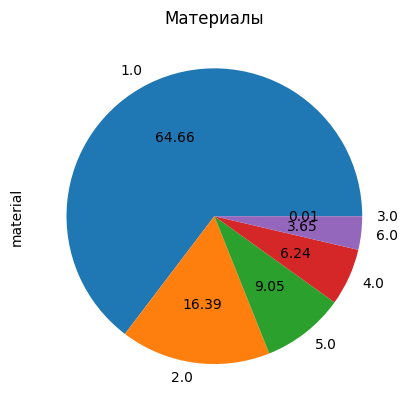

In [ ]:
train['material'].value_counts().plot(kind='pie', title='Материалы', autopct='%.2f')

Средняя цена помещений от жилищных условий


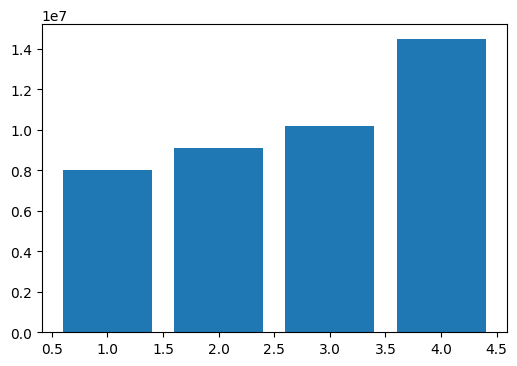

In [ ]:
state = train.groupby(["state", "price_doc"], as_index=False).count()
result = pd.DataFrame({'state':[1, 2, 3, 4], 'mean_price':[state.loc[state['state'] == 1, 'price_doc'].mean().round(1),
                                                           state.loc[state['state'] == 2, 'price_doc'].mean().round(1),
                                                           state.loc[state['state'] == 3, 'price_doc'].mean().round(1),
                                                           state.loc[state['state'] == 4, 'price_doc'].mean().round(1)]})
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.bar(result.state, result.mean_price)
print('Средняя цена помещений от жилищных условий')

<Axes: xlabel='build_year'>

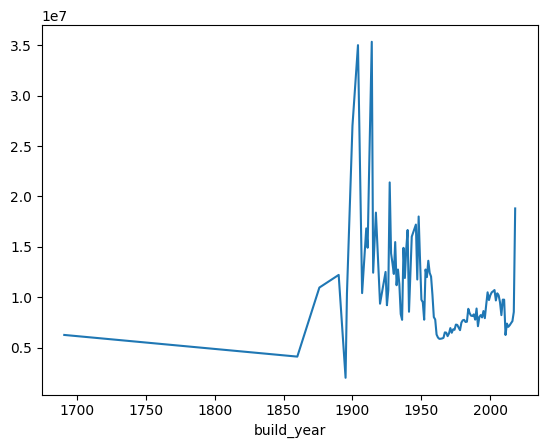

In [ ]:
train.groupby("build_year")['price_doc'].mean().plot()

# Препроцессинг

In [ ]:
nt = train.copy()
nt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     13878 non-null  float64
 3   life_sq     13828 non-null  float64
 4   floor       14637 non-null  float64
 5   state       12365 non-null  float64
 6   max_floor   13759 non-null  float64
 7   material    13938 non-null  float64
 8   build_year  12758 non-null  float64
 9   num_room    13938 non-null  float64
 10  kitch_sq    13938 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
nt = nt.sort_values(by='id')
test = test.sort_values(by='id')
test

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
2508,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78810,Koptevo
944,36,2011-09-28,39,20.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,165727,Mar'ino
3604,100,2011-10-12,74,45.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,77878,Orehovo-Borisovo Severnoe
1873,174,2011-10-21,37,22.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1452550,Bogorodskoe
1874,186,2011-10-24,98,55.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,61396,Otradnoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,30439,2015-06-26,39,20.0,7.0,3.0,12.0,1.0,1982.0,1.0,8.0,86206,Bibirevo
837,30441,2015-06-26,88,58.0,7.0,3.0,8.0,2.0,1960.0,3.0,8.0,65972,Ostankinskoe
2362,30448,2015-06-27,47,47.0,19.0,1.0,25.0,1.0,2016.0,1.0,1.0,112804,Filevskij Park
2578,30466,2015-06-30,56,29.0,13.0,3.0,14.0,1.0,2001.0,2.0,11.0,53786,Severnoe Tushino


In [ ]:
nt

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
9681,15,2011-09-19,31.0,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,142243,Lefortovo,5000000
6655,16,2011-09-20,51.0,31.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,165727,Mar'ino,1850000
11841,20,2011-09-22,44.0,29.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,12327,Gol'janovo,5200000
5811,32,2011-09-27,81.0,46.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,81887,Hovrino,18300000
13979,34,2011-09-28,31.0,18.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,130229,Moskvorech'e-Saburovo,4400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,30467,2015-06-30,56.0,51.0,19.0,1.0,19.0,1.0,2017.0,2.0,1.0,37502,Sviblovo,10262010
7273,30468,2015-06-30,52.0,NaN,13.0,1.0,17.0,1.0,NaN,2.0,1.0,116742,Tverskoe,6750554
9948,30469,2015-06-30,44.0,27.0,7.0,3.0,9.0,1.0,1975.0,2.0,6.0,61396,Otradnoe,7400000
4753,30472,2015-06-30,64.0,32.0,5.0,2.0,15.0,1.0,2003.0,2.0,11.0,83844,Obruchevskoe,13500000


In [ ]:
del nt[nt.columns[1]]
del nt[nt.columns[11]]

In [ ]:
def search_outliers(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]

In [ ]:
for feature in nt.columns:
    sum_outliers = len(search_outliers(nt[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {nt[feature].shape[0]} наблюдений")

Признак id содержит 0 выбросов из 15092 наблюдений
Признак full_sq содержит 0 выбросов из 15092 наблюдений
Признак life_sq содержит 0 выбросов из 15092 наблюдений
Признак floor содержит 0 выбросов из 15092 наблюдений
Признак state содержит 0 выбросов из 15092 наблюдений
Признак max_floor содержит 0 выбросов из 15092 наблюдений
Признак material содержит 0 выбросов из 15092 наблюдений
Признак build_year содержит 0 выбросов из 15092 наблюдений
Признак num_room содержит 0 выбросов из 15092 наблюдений
Признак kitch_sq содержит 0 выбросов из 15092 наблюдений
Признак full_all содержит 1290 выбросов из 15092 наблюдений
Признак price_doc содержит 903 выбросов из 15092 наблюдений


In [ ]:
nt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 9681 to 7564
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   full_sq     13878 non-null  float64
 2   life_sq     13828 non-null  float64
 3   floor       14637 non-null  float64
 4   state       12365 non-null  float64
 5   max_floor   13759 non-null  float64
 6   material    13938 non-null  float64
 7   build_year  12758 non-null  float64
 8   num_room    13938 non-null  float64
 9   kitch_sq    13938 non-null  float64
 10  full_all    15092 non-null  int64  
 11  price_doc   15092 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.5 MB


In [ ]:
fsq_mode = nt["full_sq"].mode()[0]
fsq_mode

38.0

In [ ]:
nt['full_sq'].fillna(fsq_mode)

9681     31.0
6655     51.0
11841    44.0
5811     81.0
13979    31.0
         ... 
12156    56.0
7273     52.0
9948     44.0
4753     64.0
7564     43.0
Name: full_sq, Length: 15092, dtype: float64

In [ ]:
"""Протестим результат"""
nt_fill = nt.fillna(fsq_mode).full_sq
nt_old = test.full_sq
sum(abs(nt_fill - nt_old))/nt_fill.shape[0] / (nt['full_sq'].max() - nt['full_sq'].min())

nan

In [ ]:
nt_fill

9681     31.0
6655     51.0
11841    44.0
5811     81.0
13979    31.0
         ... 
12156    56.0
7273     52.0
9948     44.0
4753     64.0
7564     43.0
Name: full_sq, Length: 15092, dtype: float64

In [ ]:
nt_old

2508    42
944     39
3604    74
1873    37
1874    98
        ..
2331    39
837     88
2362    47
2578    56
406     86
Name: full_sq, Length: 3774, dtype: int64

In [ ]:
nt_old.to_csv('pred_data.csv')

In [ ]:
test

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
2508,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78810,Koptevo
944,36,2011-09-28,39,20.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,165727,Mar'ino
3604,100,2011-10-12,74,45.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,77878,Orehovo-Borisovo Severnoe
1873,174,2011-10-21,37,22.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1452550,Bogorodskoe
1874,186,2011-10-24,98,55.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,61396,Otradnoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,30439,2015-06-26,39,20.0,7.0,3.0,12.0,1.0,1982.0,1.0,8.0,86206,Bibirevo
837,30441,2015-06-26,88,58.0,7.0,3.0,8.0,2.0,1960.0,3.0,8.0,65972,Ostankinskoe
2362,30448,2015-06-27,47,47.0,19.0,1.0,25.0,1.0,2016.0,1.0,1.0,112804,Filevskij Park
2578,30466,2015-06-30,56,29.0,13.0,3.0,14.0,1.0,2001.0,2.0,11.0,53786,Severnoe Tushino


In [ ]:
url = 'https://drive.google.com/uc?id=' + '1aM8uf5ljLA0lWbFmr4GOdq9fdpFB73TR'
train= pd.read_csv(
    url)
# https://drive.google.com/file/d/1aM8uf5ljLA0lWbFmr4GOdq9fdpFB73TR/view?usp=share_link
display(train)
# https://docs.google.com/spreadsheets/d/1Y5UgJcFLfArlGG2mWqszcpN6NA6BDBza/edit?usp=share_link&ouid=110900402661578047925&rtpof=true&sd=true

,Unnamed: 0,id,id.1,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,cut_sq,year
0,0,15976,15976,2014-03-13,46,29,0,2,0,1,2016,1,8,17790,Poselenie Vnukovskoe,6094854,637,2014
1,1,10334,10334,2013-09-07,37,34,0,1,0,1,2016,1,10,21155,Mitino,6488865,47,2013
2,2,12621,12621,2013-11-28,71,71,0,2,0,1,2016,3,8,39873,Poselenie Shherbinka,5584120,637,2013
3,3,14910,14910,2014-02-12,40,40,0,1,0,1,2016,1,6,17790,Poselenie Vnukovskoe,4317880,47,2014
4,4,11794,11794,2013-11-05,54,33,0,1,0,1,2016,0,0,21155,Mitino,8383079,637,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,15087,3941,3941,2012-09-28,25,10,41,2,48,1,2013,1,6,94564,Golovinskoe,2000000,15,2012
15088,15088,21609,21609,2014-08-18,74,38,41,3,48,4,2013,2,5,102726,Jakimanka,14500000,47,2014
15089,15089,26668,26668,2014-12-17,126,98,31,1,48,6,2003,1,17,166803,Shhukino,41500000,111,2014
15090,15090,30314,30314,2015-06-18,65,39,44,4,48,4,2000,2,5,102726,Jakimanka,8857680,47,2015


In [ ]:
def outliers_smoothing(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    feature = np.where(feature < lower_bound, lower_bound, feature)
    feature = np.where(feature > upper_bound, upper_bound, feature)
    return feature

In [ ]:
dn = train.copy()
for feature in train.select_dtypes(include=[float,int]).columns:
    dn[feature] = outliers_smoothing(dn[feature])

In [ ]:
! pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nt_old
# https://docs.google.com/spreadsheets/d/1Y5UgJcFLfArlGG2mWqszcpN6NA6BDBza/edit?usp=share_link&ouid=110900402661578047925&rtpof=true&sd=true
url = 'https://drive.google.com/uc?id=' + '1Y5UgJcFLfArlGG2mWqszcpN6NA6BDBza'
train_p= pd.read_excel(url)
pred_data = dn.drop(['id.1', 'Unnamed: 0', 'timestamp' ], axis=1)
pred_data.set_index('id', inplace=True, drop=True)
# display(pred_data)
x = dn.loc[nt_old].copy()

float_col= pred_data.select_dtypes(include=[float]).columns.to_list()
x.loc[:, float_col] = x.loc[:, float_col].astype(int)
pred_data.loc[:, float_col] = pred_data.loc[:, float_col].astype(int)

x.drop(['id', 'id.1', 'Unnamed: 0', 'timestamp'], axis=1, inplace=True)

catrgorical_features= ['state', 'material', 'cut_sq', 'num_room']
x.loc[:, catrgorical_features] = x.loc[:, catrgorical_features].astype("category")
pred_data.loc[:, catrgorical_features] = pred_data.loc[:, catrgorical_features].\
    astype("category")

# display(x.info())
pred_data.loc[:, float_col] = pred_data.loc[:, float_col].astype(int)
pred_data.loc[:, catrgorical_features] = pred_data.loc[:, catrgorical_features].astype("category")
display(pred_data)
# display(pred_data.info())

<ipython-input-106-d2ae83e30967>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, float_col] = x.loc[:, float_col].astype(int)
<ipython-input-106-d2ae83e30967>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pred_data.loc[:, float_col] = pred_data.loc[:, float_col].astype(int)
<ipython-input-106-d2ae83e30967>:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, i

,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,cut_sq,year
id,,,,,,,,,,,,,,
15976.0,46,29,0,2,0,1,2016,1,8,17790,Poselenie Vnukovskoe,6094854,71,2014
10334.0,37,34,0,1,0,1,2016,1,10,21155,Mitino,6488865,47,2013
12621.0,71,71,0,2,0,1,2016,3,8,39873,Poselenie Shherbinka,5584120,71,2013
14910.0,40,40,0,1,0,1,2016,1,6,17790,Poselenie Vnukovskoe,4317880,47,2014
11794.0,54,33,0,1,0,1,2016,0,0,21155,Mitino,8383079,71,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941.0,25,10,20,2,29,1,2013,1,6,94564,Golovinskoe,2000000,15,2012
21609.0,74,38,20,3,29,3,2013,2,5,102726,Jakimanka,14500000,47,2014
26668.0,100,76,20,1,29,3,2003,1,16,166803,Shhukino,14600000,71,2014


In [ ]:
from sklearn.preprocessing import  StandardScaler
st_scal = StandardScaler()
scal_data = pred_data.copy()
scal_data.loc[:, pred_data.select_dtypes(exclude=object).columns] = st_scal.\
fit_transform(pred_data.select_dtypes(exclude=object))
scal_data.loc[:, float_col] = scal_data.loc[:, float_col].astype(int)
scal_data.loc[:, catrgorical_features] = scal_data.loc[:, catrgorical_features].astype("category")


<ipython-input-107-8ea4c95882b3>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  scal_data.loc[:, pred_data.select_dtypes(exclude=object).columns] = st_scal.\
<ipython-input-107-8ea4c95882b3>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  scal_data.loc[:, float_col] = scal_data.loc[:, float_col].astype(int)


In [ ]:
display(scal_data.info())
display(x.select_dtypes(exclude=[object]).info())


<class 'pandas.core.frame.DataFrame'>
Float64Index: 15092 entries, 15976.0 to 24023.0
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   full_sq     15092 non-null  int64   
 1   life_sq     15092 non-null  int64   
 2   floor       15092 non-null  int64   
 3   state       15092 non-null  category
 4   max_floor   15092 non-null  int64   
 5   material    15092 non-null  category
 6   build_year  15092 non-null  int64   
 7   num_room    15092 non-null  category
 8   kitch_sq    15092 non-null  int64   
 9   full_all    15092 non-null  int64   
 10  sub_area    15092 non-null  object  
 11  price_doc   15092 non-null  int64   
 12  cut_sq      15092 non-null  category
 13  year        15092 non-null  int64   
dtypes: category(4), int64(9), object(1)
memory usage: 1.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 42 to 86
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   full_sq     3774 non-null   int64   
 1   life_sq     3774 non-null   int64   
 2   floor       3774 non-null   int64   
 3   state       3774 non-null   category
 4   max_floor   3774 non-null   int64   
 5   material    3774 non-null   category
 6   build_year  3774 non-null   int64   
 7   num_room    3774 non-null   category
 8   kitch_sq    3774 non-null   int64   
 9   full_all    3774 non-null   int64   
 10  price_doc   3774 non-null   int64   
 11  cut_sq      3774 non-null   category
 12  year        3774 non-null   int64   
dtypes: category(4), int64(9)
memory usage: 310.3 KB


None

In [ ]:
x = pred_data.copy()
x.reset_index(inplace=True)
x.id = x.id.astype(int)

x = x.set_index('id')
display(x)
y = pred_data.price_doc
x = x.drop('price_doc', axis=1)


,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,cut_sq,year
id,,,,,,,,,,,,,,
15976,46,29,0,2,0,1,2016,1,8,17790,Poselenie Vnukovskoe,6094854,71,2014
10334,37,34,0,1,0,1,2016,1,10,21155,Mitino,6488865,47,2013
12621,71,71,0,2,0,1,2016,3,8,39873,Poselenie Shherbinka,5584120,71,2013
14910,40,40,0,1,0,1,2016,1,6,17790,Poselenie Vnukovskoe,4317880,47,2014
11794,54,33,0,1,0,1,2016,0,0,21155,Mitino,8383079,71,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,25,10,20,2,29,1,2013,1,6,94564,Golovinskoe,2000000,15,2012
21609,74,38,20,3,29,3,2013,2,5,102726,Jakimanka,14500000,47,2014
26668,100,76,20,1,29,3,2003,1,16,166803,Shhukino,14600000,71,2014


In [ ]:
# x = x.drop('price_doc', axis=1)
x = x.select_dtypes(include=[float, int, 'category'])
test = pd.read_csv('test.csv')
train00 = pd.read_csv('train.csv')
test.set_index('id', inplace=True, drop=True)
test.head(6)
test0 = test.copy()
test = test.drop('timestamp', axis=1)

display(train00)

train00.set_index('id', inplace=True, drop=True)
sub_area_cat = train00['sub_area'].unique()
dict_sub_area = {k: i for i, k in  enumerate(sub_area_cat) }

print(dict_sub_area)
train00['sub_area'] = train00['sub_area'].apply(lambda x: dict_sub_area[x])
display(train00['sub_area'].info())
test['sub_area'] = test0['sub_area'].apply(lambda x: dict_sub_area[x])

float_col= test.select_dtypes(include=[float]).columns.to_list()
for col in test.columns:
  test[col] = test[col].fillna(test[col].mode()[0])
test.loc[:, float_col] = test.loc[:, float_col].astype(int)
cat_features = ['state', 'material', 'sub_area']
test.loc[:, cat_features] = test.loc[:,  cat_features].astype('category')


x['sub_area'] = train00['sub_area']
x.loc[:, cat_features] = x.loc[:,  cat_features].astype('category')

x = x.loc[:, test.columns]
display(test)
display(x)
display(x.info())
# display(test.info())


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000


{'Pechatniki': 0, 'Dorogomilovo': 1, 'Ivanovskoe': 2, 'Jasenevo': 3, 'Nagatinskij Zaton': 4, 'Rjazanskij': 5, 'Caricyno': 6, "Kon'kovo": 7, 'Vyhino-Zhulebino': 8, 'Nekrasovka': 9, 'Poselenie Sosenskoe': 10, 'Mitino': 11, 'Matushkino': 12, 'Ostankinskoe': 13, 'Krylatskoe': 14, 'Otradnoe': 15, 'Mozhajskoe': 16, 'Teplyj Stan': 17, 'Poselenie Shherbinka': 18, 'Juzhnoe Medvedkovo': 19, 'Butyrskoe': 20, 'Birjulevo Zapadnoe': 21, 'Horoshevo-Mnevniki': 22, 'Orehovo-Borisovo Juzhnoe': 23, 'Ramenki': 24, 'Poselenie Voskresenskoe': 25, 'Nagatino-Sadovniki': 26, 'Golovinskoe': 27, 'Savelovskoe': 28, 'Brateevo': 29, "Krasnosel'skoe": 30, 'Bogorodskoe': 31, 'Birjulevo Vostochnoe': 32, 'Severnoe Izmajlovo': 33, 'Preobrazhenskoe': 34, 'Beskudnikovskoe': 35, 'Poselenie Vnukovskoe': 36, 'Sviblovo': 37, 'Hovrino': 38, 'Danilovskoe': 39, 'Severnoe Butovo': 40, "Moskvorech'e-Saburovo": 41, 'Chertanovo Juzhnoe': 42, 'Presnenskoe': 43, 'Poselenie Moskovskij': 44, 'Akademicheskoe': 45, 'Ochakovo-Matveevskoe':

None

<ipython-input-110-08b4ef0a5638>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, float_col] = test.loc[:, float_col].astype(int)
<ipython-input-110-08b4ef0a5638>:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, cat_features] = x.loc[:,  cat_features].astype('category')


,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
id,,,,,,,,,,,
1417,51,31,16,3,17,1,2014,2,8,221709,54
9725,44,29,5,3,9,1,1969,2,5,37502,37
30369,32,18,1,3,9,1,1970,1,6,125354,70
20522,51,30,11,1,17,1,2003,2,9,130229,41
12891,44,28,4,2,5,1,1965,2,5,145576,6
...,...,...,...,...,...,...,...,...,...,...,...
10843,53,28,9,3,16,5,1976,2,11,1318695,8
543,31,17,5,3,17,1,2014,2,8,85083,56
25332,38,19,8,3,16,1,1977,1,10,111023,46


,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
id,,,,,,,,,,,
15976,46,29,0,2,0,1,2016,1,8,17790,36
10334,37,34,0,1,0,1,2016,1,10,21155,11
12621,71,71,0,2,0,1,2016,3,8,39873,18
14910,40,40,0,1,0,1,2016,1,6,17790,36
11794,54,33,0,1,0,1,2016,0,0,21155,11
...,...,...,...,...,...,...,...,...,...,...,...
3941,25,10,20,2,29,1,2013,1,6,94564,27
21609,74,38,20,3,29,3,2013,2,5,102726,83
26668,100,76,20,1,29,3,2003,1,16,166803,122


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 15976 to 24023
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   full_sq     15092 non-null  int64   
 1   life_sq     15092 non-null  int64   
 2   floor       15092 non-null  int64   
 3   state       15092 non-null  category
 4   max_floor   15092 non-null  int64   
 5   material    15092 non-null  category
 6   build_year  15092 non-null  int64   
 7   num_room    15092 non-null  category
 8   kitch_sq    15092 non-null  int64   
 9   full_all    15092 non-null  int64   
 10  sub_area    15092 non-null  category
dtypes: category(4), int64(7)
memory usage: 1022.8 KB


None

In [ ]:
x['sub_area'] = x['sub_area'].astype("category")
x['num_room'] = x['num_room'].astype(int)

x.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 15976 to 24023
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   full_sq     15092 non-null  int64   
 1   life_sq     15092 non-null  int64   
 2   floor       15092 non-null  int64   
 3   state       15092 non-null  category
 4   max_floor   15092 non-null  int64   
 5   material    15092 non-null  category
 6   build_year  15092 non-null  int64   
 7   num_room    15092 non-null  int64   
 8   kitch_sq    15092 non-null  int64   
 9   full_all    15092 non-null  int64   
 10  sub_area    15092 non-null  category
dtypes: category(3), int64(8)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 1417 to 12647
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   full_sq     3774 non-null   int64   
 1   life_sq     3774 non-null   int64   
 2   floor 

In [ ]:
display(x)
display(test)


,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
id,,,,,,,,,,,
15976,46,29,0,2,0,1,2016,1,8,17790,36
10334,37,34,0,1,0,1,2016,1,10,21155,11
12621,71,71,0,2,0,1,2016,3,8,39873,18
14910,40,40,0,1,0,1,2016,1,6,17790,36
11794,54,33,0,1,0,1,2016,0,0,21155,11
...,...,...,...,...,...,...,...,...,...,...,...
3941,25,10,20,2,29,1,2013,1,6,94564,27
21609,74,38,20,3,29,3,2013,2,5,102726,83
26668,100,76,20,1,29,3,2003,1,16,166803,122


,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
id,,,,,,,,,,,
1417,51,31,16,3,17,1,2014,2,8,221709,54
9725,44,29,5,3,9,1,1969,2,5,37502,37
30369,32,18,1,3,9,1,1970,1,6,125354,70
20522,51,30,11,1,17,1,2003,2,9,130229,41
12891,44,28,4,2,5,1,1965,2,5,145576,6
...,...,...,...,...,...,...,...,...,...,...,...
10843,53,28,9,3,16,5,1976,2,11,1318695,8
543,31,17,5,3,17,1,2014,2,8,85083,56
25332,38,19,8,3,16,1,1977,1,10,111023,46


In [ ]:
x_to_concat = x.copy()

In [ ]:
! pip install -U catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
x['timestamp'] = train00['timestamp']
x = x.merge(macro, how='left', on='timestamp')

test['timestamp'] = test0['timestamp']
test = test.merge(macro, how='left', on='timestamp')


In [ ]:
# url = 'https://drive.google.com/uc?id=' + '1aM8uf5ljLA0lWbFmr4GOdq9fdpFB73TR'
# train= pd.read_csv(
#     url)
# # https://drive.google.com/file/d/1aM8uf5ljLA0lWbFmr4GOdq9fdpFB73TR/view?usp=share_link
# display(train)
# # https://docs.google.com/spreadsheets/d/1Y5UgJcFLfArlGG2mWqszcpN6NA6BDBza/edit?usp=share_link&ouid=110900402661578047925&rtpof=true&sd=true
# train_c.info()
# macro = pd.read_csv('macro.csv')
# train_c = train.copy()
# train_macro = train.merge(macro, how='left', on='timestamp')
# cut_sq = train.cut_sq.max()
# train_macro.loc[train_macro['cut_sq'].isna(), 'cut_sq'] = cut_sq
# train = train_macro.copy()

In [ ]:
# df = train.drop(['id', 'id.1', 'Unnamed: 0', "cut_sq",  'year'], axis=1)
# x = df.drop('price_doc', axis=1)

# y = df['price_doc']
# display(x.info(), y)
# # x = x.select_dtypes(exclude=[object])
# x = x.drop('timestamp', axis=1)
# display(x)

In [ ]:
# cat_col = ['material', 'state', 'sub_area']
# for c in cat_col:
#   x[c] = x[c].astype('category')

In [ ]:
test['sub_area'] = test['sub_area'].astype("category")
display(x.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   full_sq               15092 non-null  int64   
 1   life_sq               15092 non-null  int64   
 2   floor                 15092 non-null  int64   
 3   state                 15092 non-null  category
 4   max_floor             15092 non-null  int64   
 5   material              15092 non-null  category
 6   build_year            15092 non-null  int64   
 7   num_room              15092 non-null  int64   
 8   kitch_sq              15092 non-null  int64   
 9   full_all              15092 non-null  int64   
 10  sub_area              15092 non-null  category
 11  timestamp             15092 non-null  object  
 12  salary                15092 non-null  float64 
 13  fixed_basket          15092 non-null  float64 
 14  rent_price_3room_eco  15092 non-null  float64 
 15  re

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 3773
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   full_sq               3774 non-null   int64   
 1   life_sq               3774 non-null   int64   
 2   floor                 3774 non-null   int64   
 3   state                 3774 non-null   category
 4   max_floor             3774 non-null   int64   
 5   material              3774 non-null   category
 6   build_year            3774 non-null   int64   
 7   num_room              3774 non-null   int64   
 8   kitch_sq              3774 non-null   int64   
 9   full_all              3774 non-null   int64   
 10  sub_area              3774 non-null   category
 11  timestamp             3774 non-null   object  
 12  salary                3774 non-null   float64 
 13  fixed_basket          3774 non-null   float64 
 14  rent_price_3room_eco  3774 non-null   float64 
 15  rent

None

In [ ]:
x = x.select_dtypes(exclude=[object])
test = test.select_dtypes(exclude=[object])


# macro_col

In [ ]:
# # исключить макро колонки
# macro_col = list(macro.columns)
# macro_col
# x = x.drop(macro_col, axis=1)
# test = test.drop(macro_col, axis=1)


In [ ]:
import scipy.stats

In [ ]:
data5 = x.copy()

# skew train

In [ ]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,full_sq,0.838563,0.838563,True
1,life_sq,1.011887,1.011887,True
2,floor,0.831730,0.831730,True
3,max_floor,0.172096,0.172096,False
4,build_year,-0.142119,0.142119,False
5,num_room,0.523128,0.523128,True
6,kitch_sq,0.806950,0.806950,True
7,full_all,0.685281,0.685281,True
8,salary,-1.456781,1.456781,True
9,fixed_basket,0.387993,0.387993,False


In [ ]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])

In [ ]:
data5

,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,3.850148,3.401197,0.000000,2,0,1,2016,0.693147,2.197225,9.786448,36,11.022050,15916.88,49.75,3.759105,3.533978,4.352855
1,3.637586,3.555348,0.000000,1,0,1,2016,0.693147,2.397895,9.959679,11,10.923890,15215.84,49.12,3.763523,3.570377,4.348599
2,4.276666,4.276666,0.000000,2,0,1,2016,1.386294,2.197225,10.593480,18,10.923890,15367.58,49.29,3.761665,3.570940,4.348599
3,3.713572,3.713572,0.000000,1,0,1,2016,0.693147,1.945910,9.786448,36,11.022050,15730.81,49.24,3.756304,3.545298,4.352855
4,4.007333,3.526361,0.000000,1,0,1,2016,0.000000,0.000000,9.959679,11,10.923890,15367.58,49.29,3.761665,3.570940,4.348599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,3.258097,2.397895,3.044522,2,29,1,2013,0.693147,1.945910,11.457043,27,10.796129,13726.03,47.30,3.729541,3.523415,4.340423
15088,4.317488,3.663562,3.044522,3,29,3,2013,1.098612,1.791759,11.539830,83,11.022050,16134.39,52.81,3.786687,3.578786,4.352855
15089,4.615121,4.343805,3.044522,1,29,3,2003,0.693147,2.833213,12.024575,122,11.022050,16910.54,49.89,3.775974,3.564732,4.352855
15090,4.189655,3.688879,3.044522,4,29,3,2000,1.098612,1.791759,11.539830,83,11.071486,18720.65,49.01,3.686627,3.443299,4.353756


# skew test

In [ ]:
test1 = test.copy()

In [ ]:
skew_df = pd.DataFrame(test1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(test1[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,full_sq,2.794591,2.794591,True
1,life_sq,59.223541,59.223541,True
2,floor,1.017643,1.017643,True
3,max_floor,0.266446,0.266446,False
4,build_year,-3.965052,3.965052,True
5,num_room,0.631865,0.631865,True
6,kitch_sq,6.807927,6.807927,True
7,full_all,3.841172,3.841172,True
8,salary,-1.532693,1.532693,True
9,fixed_basket,0.395758,0.395758,False


In [ ]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    test1[column] = np.log1p(test1[column])

In [ ]:
test1

,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,3.951244,3.465736,2.833213,3,17,1,7.608374,1.098612,2.197225,12.309126,54,10.796129,13243.77,45.31,3.675034,3.485539,4.340423
1,3.806662,3.401197,1.791759,3,9,1,7.585789,1.098612,1.791759,10.532176,37,10.923890,15241.93,48.22,3.768845,3.530763,4.348599
2,3.496508,2.944439,0.693147,3,9,1,7.586296,0.693147,1.945910,11.738905,70,11.071486,18720.65,49.01,3.686627,3.443299,4.353756
3,3.951244,3.433987,2.484907,1,17,1,7.602900,1.098612,2.302585,11.777057,41,11.022050,16251.41,50.93,3.760502,3.545875,4.352855
4,3.806662,3.367296,1.609438,2,5,1,7.583756,1.098612,1.791759,11.888460,6,10.923890,15417.34,48.50,3.761200,3.554491,4.348599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,3.988984,3.367296,2.302585,3,16,5,7.589336,1.098612,2.484907,14.092154,8,10.923890,15215.84,49.12,3.763523,3.570377,4.348599
3770,3.465736,2.890372,1.791759,3,17,1,7.608374,1.098612,2.197225,11.351394,56,10.712186,12992.44,46.44,3.661765,3.457578,4.341074
3771,3.663562,2.995732,2.197225,3,16,1,7.589842,0.693147,2.397895,11.617502,46,11.022050,16648.70,53.21,3.789403,3.563883,4.352855
3772,4.795791,4.060443,2.079442,3,10,2,7.593878,1.386294,2.484907,10.763123,120,11.022050,16648.70,53.21,3.789403,3.563883,4.352855


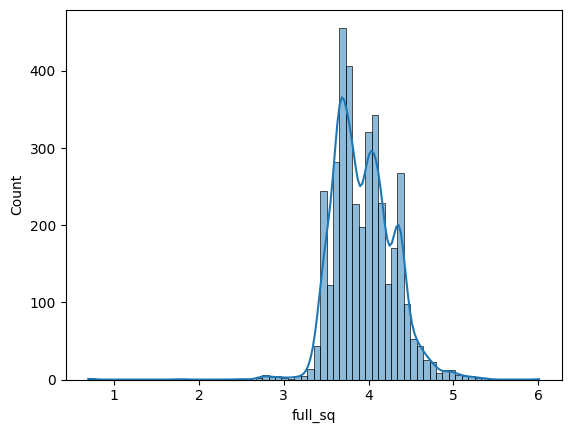

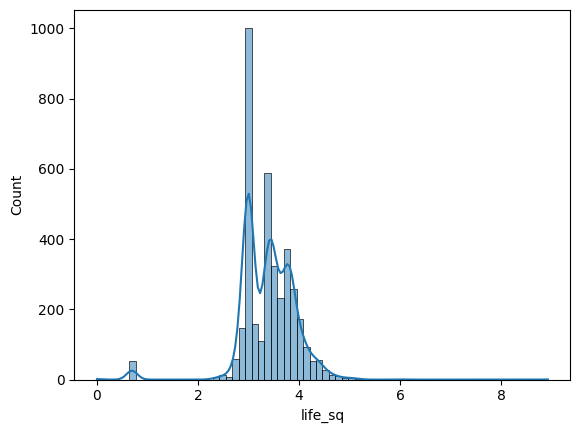

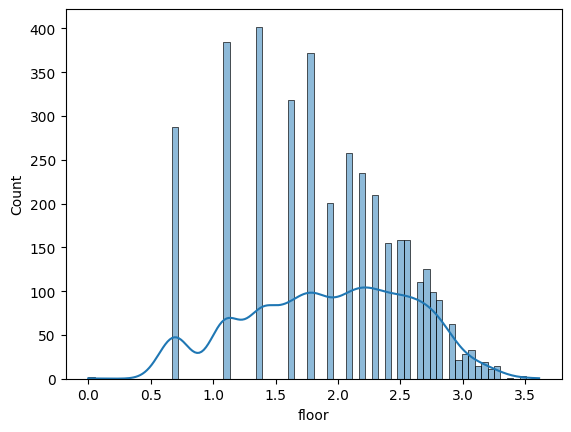

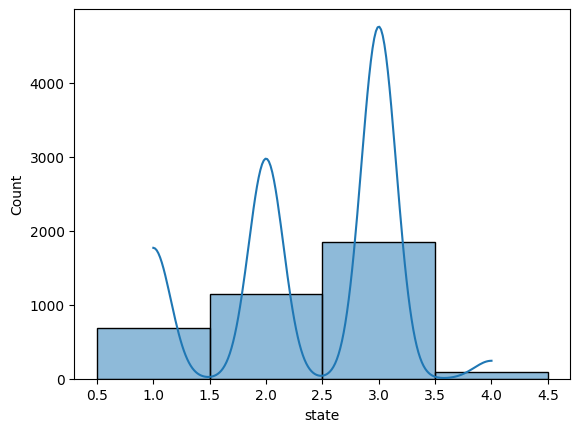

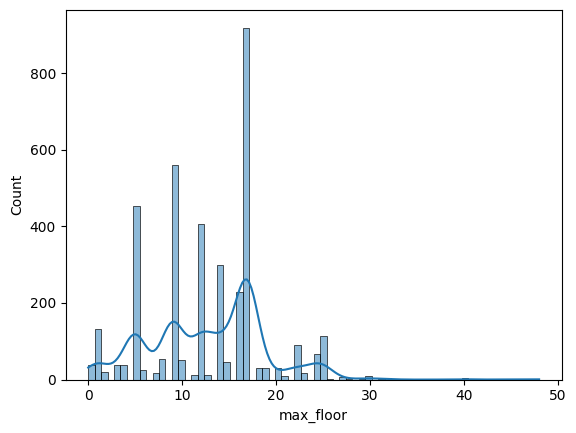

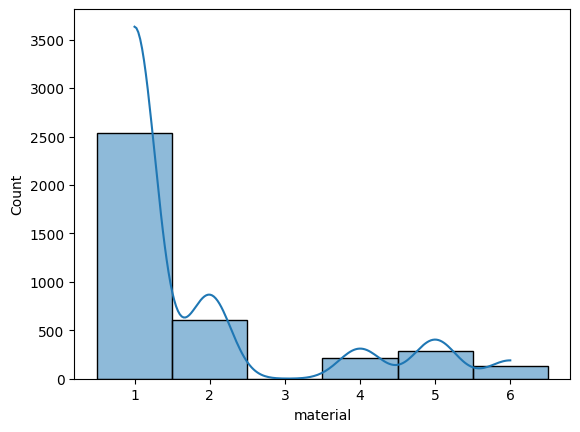

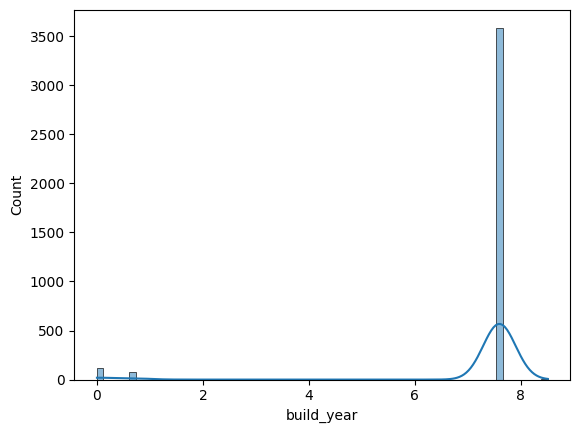

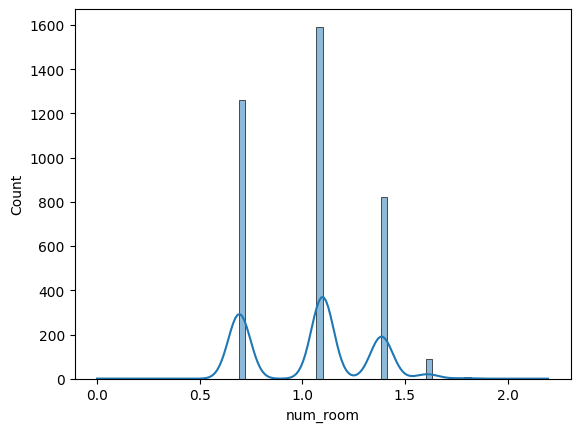

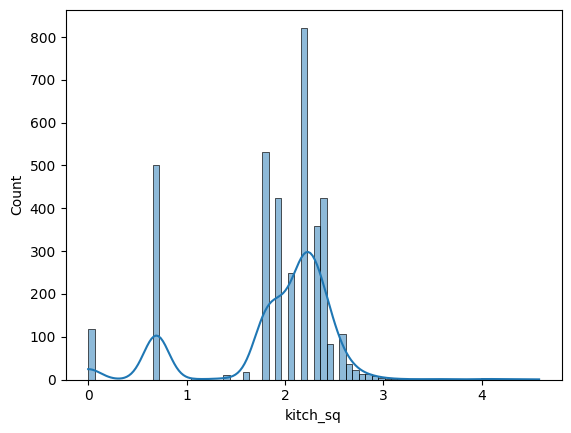

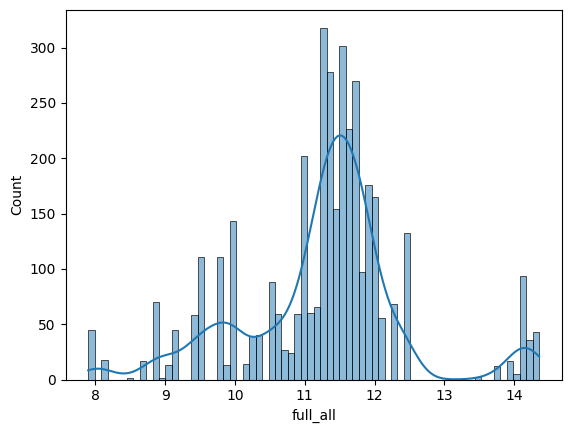

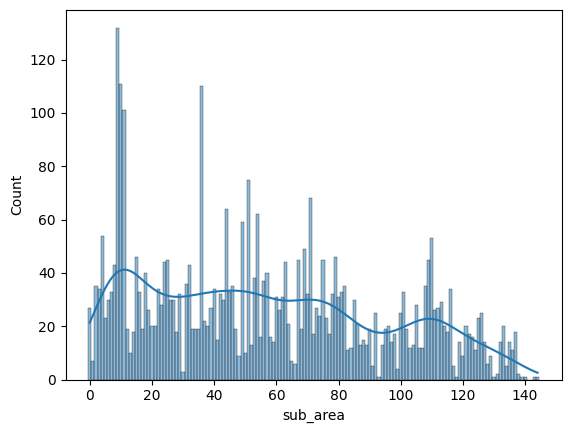

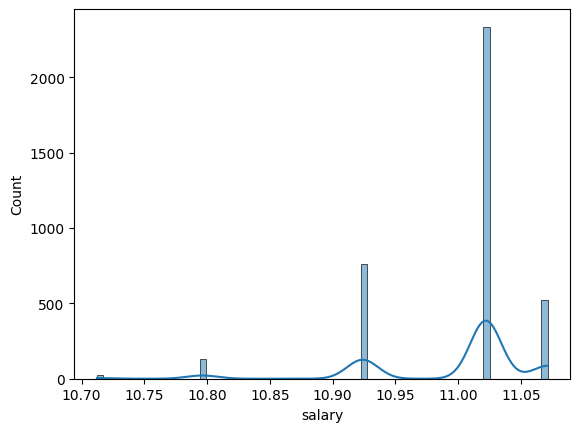

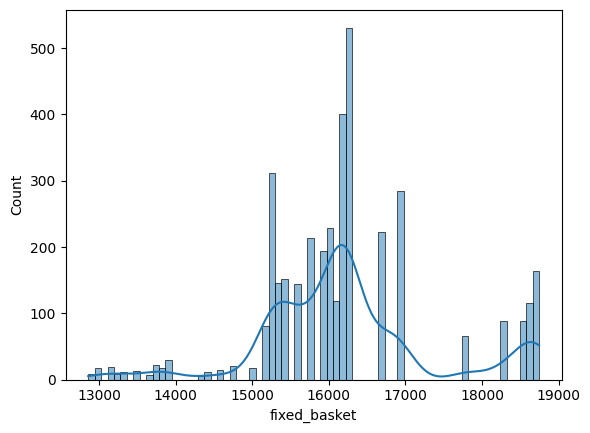

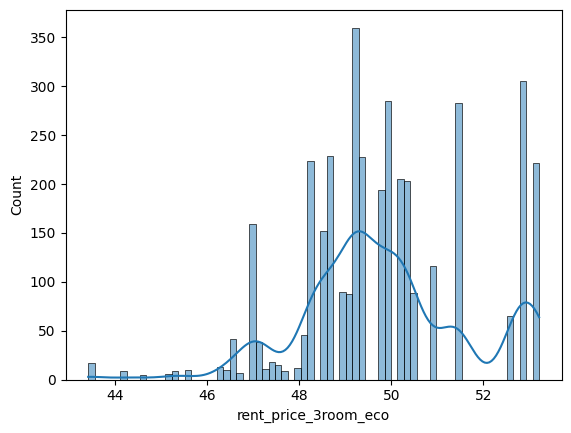

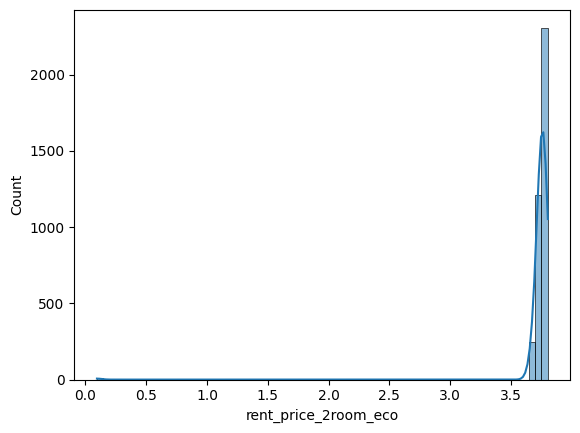

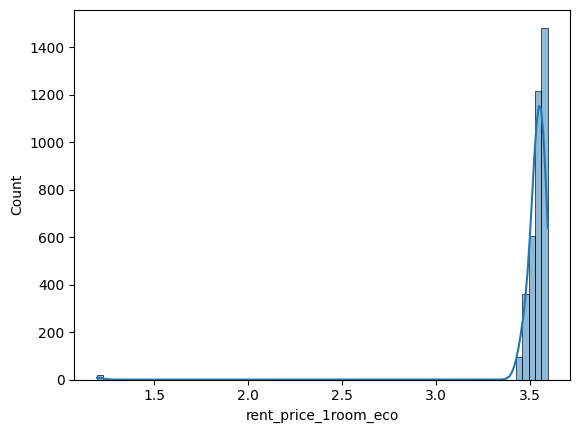

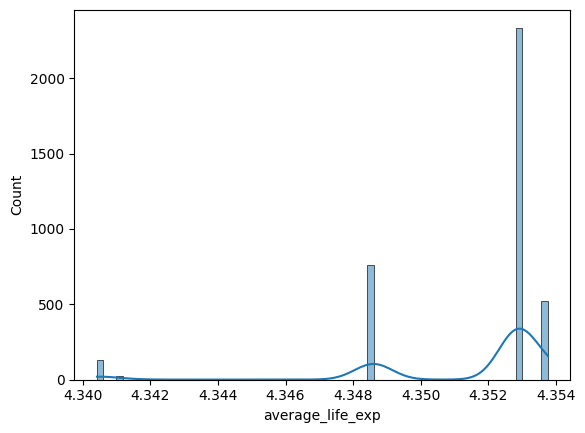

In [ ]:
for col in test1.columns:
  sns.histplot(test1[col], kde=True, bins=70)
  plt.show()

# transform target

In [ ]:
target = train['price_doc']
target_transform = np.log(target)

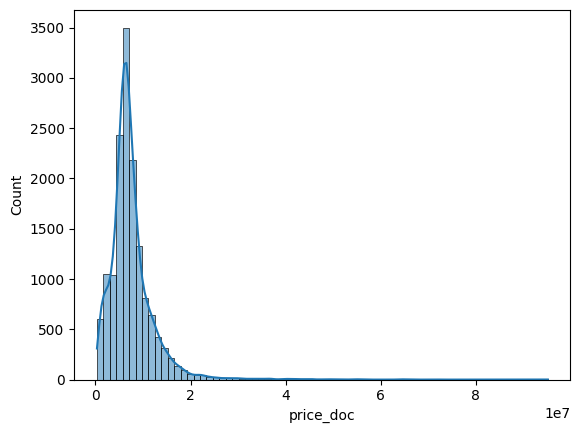

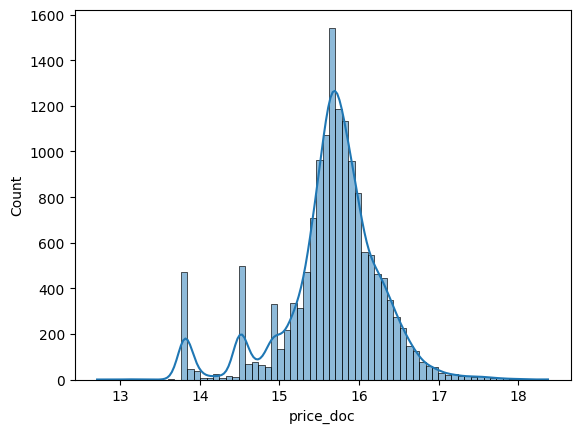

In [ ]:
sns.histplot(target, kde=True, bins=70)
plt.show()
sns.histplot(target_transform, kde=True, bins=70)
plt.show()


# skew category features

In [ ]:
data6 = data5.copy()

In [ ]:
for c in data5.select_dtypes(include=['category']).columns:
  unique = sorted(list(data5[c].unique()))
  print(f'{c} --> {unique}')
  print(f'{min(unique)} - {max(unique)}')


state --> [1, 2, 3, 4]
1 - 4
material --> [1, 2, 3]
1 - 3
sub_area --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]
0 - 145


In [ ]:
(-np.cos(3 * (3-1)))

-0.960170286650366

In [ ]:
data5['material'] = data5['material'].astype(int)
data5['material_scal'] = (-np.cos(2.4 * (data5['material']-1))) #-\cos\left(2.4\left(x-1\right)\right)
np.max(data5['material_scal']), np.min(data5['material_scal'])

(0.7373937155412454, -1.0)

In [ ]:
# for col in data6.columns:
#   sns.histplot(data6[col], kde=True, bins=70)
#   plt.show()

In [ ]:
data7 = pd.get_dummies(data6)

In [ ]:
pd.set_option('display.expand_frame_repr', True)

In [ ]:
data7

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,full_all,salary,fixed_basket,...,sub_area_136,sub_area_137,sub_area_138,sub_area_139,sub_area_140,sub_area_141,sub_area_142,sub_area_143,sub_area_144,sub_area_145
0,3.850148,3.401197,0.000000,0,2016,0.693147,2.197225,9.786448,11.022050,15916.88,...,0,0,0,0,0,0,0,0,0,0
1,3.637586,3.555348,0.000000,0,2016,0.693147,2.397895,9.959679,10.923890,15215.84,...,0,0,0,0,0,0,0,0,0,0
2,4.276666,4.276666,0.000000,0,2016,1.386294,2.197225,10.593480,10.923890,15367.58,...,0,0,0,0,0,0,0,0,0,0
3,3.713572,3.713572,0.000000,0,2016,0.693147,1.945910,9.786448,11.022050,15730.81,...,0,0,0,0,0,0,0,0,0,0
4,4.007333,3.526361,0.000000,0,2016,0.000000,0.000000,9.959679,10.923890,15367.58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,3.258097,2.397895,3.044522,29,2013,0.693147,1.945910,11.457043,10.796129,13726.03,...,0,0,0,0,0,0,0,0,0,0
15088,4.317488,3.663562,3.044522,29,2013,1.098612,1.791759,11.539830,11.022050,16134.39,...,0,0,0,0,0,0,0,0,0,0
15089,4.615121,4.343805,3.044522,29,2003,0.693147,2.833213,12.024575,11.022050,16910.54,...,0,0,0,0,0,0,0,0,0,0
15090,4.189655,3.688879,3.044522,29,2000,1.098612,1.791759,11.539830,11.071486,18720.65,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   full_sq               15092 non-null  int64   
 1   life_sq               15092 non-null  int64   
 2   floor                 15092 non-null  int64   
 3   state                 15092 non-null  category
 4   max_floor             15092 non-null  int64   
 5   material              15092 non-null  category
 6   build_year            15092 non-null  int64   
 7   num_room              15092 non-null  int64   
 8   kitch_sq              15092 non-null  int64   
 9   full_all              15092 non-null  int64   
 10  sub_area              15092 non-null  category
 11  salary                15092 non-null  float64 
 12  fixed_basket          15092 non-null  float64 
 13  rent_price_3room_eco  15092 non-null  float64 
 14  rent_price_2room_eco  15092 non-null  float64 
 15  re

In [ ]:
test2 = pd.get_dummies(test1)

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 3773
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   full_sq               3774 non-null   float64 
 1   life_sq               3774 non-null   float64 
 2   floor                 3774 non-null   float64 
 3   state                 3774 non-null   category
 4   max_floor             3774 non-null   int64   
 5   material              3774 non-null   category
 6   build_year            3774 non-null   float64 
 7   num_room              3774 non-null   float64 
 8   kitch_sq              3774 non-null   float64 
 9   full_all              3774 non-null   float64 
 10  sub_area              3774 non-null   category
 11  salary                3774 non-null   float64 
 12  fixed_basket          3774 non-null   float64 
 13  rent_price_3room_eco  3774 non-null   float64 
 14  rent_price_2room_eco  3774 non-null   float64 
 15  rent

In [ ]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15092 entries, 0 to 15091
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   full_sq               15092 non-null  float64 
 1   life_sq               15092 non-null  float64 
 2   floor                 15092 non-null  float64 
 3   state                 15092 non-null  category
 4   max_floor             15092 non-null  int64   
 5   material              15092 non-null  category
 6   build_year            15092 non-null  int64   
 7   num_room              15092 non-null  float64 
 8   kitch_sq              15092 non-null  float64 
 9   full_all              15092 non-null  float64 
 10  sub_area              15092 non-null  category
 11  salary                15092 non-null  float64 
 12  fixed_basket          15092 non-null  float64 
 13  rent_price_3room_eco  15092 non-null  float64 
 14  rent_price_2room_eco  15092 non-null  float64 
 15  re

In [ ]:
all_col =set(data7.columns).union(set(test2.columns))
print(len(all_col))
all_col = set(all_col)
for i, c in enumerate(all_col):
  if c not in list(test2.columns):
    test2.insert(i, c, 0)
  elif c not in list(data7.columns):
    data7.insert(i, c, 0)
all_col = list(all_col)
print(all_col)
data7 = data7.loc[:, ['sub_area_100', 'sub_area_61', 'sub_area_65', 'sub_area_6', 'sub_area_118', 'sub_area_126', 'state_3', 'sub_area_38', 'sub_area_129', 'sub_area_59', 'sub_area_115', 'sub_area_2', 'sub_area_121', 'sub_area_130', 'sub_area_96', 'sub_area_139', 'sub_area_77', 'sub_area_23', 'fixed_basket', 'sub_area_27', 'sub_area_70', 'sub_area_133', 'sub_area_74', 'sub_area_141', 'sub_area_112', 'material_6', 'sub_area_109', 'sub_area_108', 'sub_area_91', 'sub_area_119', 'sub_area_44', 'build_year', 'sub_area_87', 'sub_area_35', 'sub_area_73', 'sub_area_33', 'sub_area_34', 'floor', 'sub_area_134', 'kitch_sq', 'sub_area_36', 'sub_area_123', 'sub_area_132', 'sub_area_98', 'sub_area_48', 'sub_area_12', 'full_sq', 'sub_area_111', 'sub_area_25', 'sub_area_5', 'sub_area_67', 'sub_area_39', 'sub_area_131', 'max_floor', 'sub_area_113', 'sub_area_81', 'sub_area_37', 'average_life_exp', 'sub_area_3', 'sub_area_128', 'sub_area_53', 'sub_area_125', 'sub_area_143', 'sub_area_7', 'sub_area_32', 'sub_area_101', 'sub_area_62', 'sub_area_95', 'sub_area_144', 'sub_area_86', 'sub_area_52', 'sub_area_14', 'sub_area_93', 'sub_area_55', 'sub_area_84', 'sub_area_140', 'sub_area_42', 'sub_area_122', 'sub_area_9', 'sub_area_47', 'sub_area_63', 'sub_area_107', 'sub_area_19', 'num_room', 'sub_area_15', 'sub_area_72', 'sub_area_127', 'material_1', 'sub_area_17', 'sub_area_58', 'state_1', 'sub_area_46', 'sub_area_49', 'sub_area_69', 'sub_area_80', 'sub_area_66', 'sub_area_117', 'sub_area_138', 'sub_area_51', 'sub_area_90', 'sub_area_75', 'sub_area_45', 'sub_area_28', 'sub_area_142', 'sub_area_24', 'sub_area_68', 'sub_area_137', 'sub_area_20', 'sub_area_31', 'sub_area_104', 'sub_area_40', 'sub_area_97', 'state_4', 'sub_area_60', 'rent_price_2room_eco', 'sub_area_88', 'sub_area_92', 'sub_area_89', 'full_all', 'sub_area_120', 'sub_area_54', 'sub_area_29', 'sub_area_56', 'sub_area_79', 'sub_area_26', 'sub_area_83', 'sub_area_43', 'sub_area_57', 'sub_area_41', 'sub_area_10', 'material_2', 'sub_area_16', 'sub_area_110', 'sub_area_103', 'sub_area_114', 'rent_price_3room_eco', 'sub_area_8', 'sub_area_136', 'salary', 'sub_area_102', 'material_5', 'sub_area_21', 'sub_area_85', 'sub_area_4', 'sub_area_99', 'sub_area_71', 'sub_area_78', 'sub_area_0', 'sub_area_18', 'sub_area_30', 'sub_area_13', 'rent_price_1room_eco', 'sub_area_50', 'sub_area_105', 'sub_area_82', 'sub_area_135', 'sub_area_124', 'sub_area_106', 'sub_area_116', 'sub_area_11', 'sub_area_76', 'sub_area_1', 'sub_area_22', 'sub_area_94', 'life_sq', 'sub_area_145', 'state_2', 'material_4', 'sub_area_64', 'material_3']]
test2 = test2.loc[:, ['sub_area_100', 'sub_area_61', 'sub_area_65', 'sub_area_6', 'sub_area_118', 'sub_area_126', 'state_3', 'sub_area_38', 'sub_area_129', 'sub_area_59', 'sub_area_115', 'sub_area_2', 'sub_area_121', 'sub_area_130', 'sub_area_96', 'sub_area_139', 'sub_area_77', 'sub_area_23', 'fixed_basket', 'sub_area_27', 'sub_area_70', 'sub_area_133', 'sub_area_74', 'sub_area_141', 'sub_area_112', 'material_6', 'sub_area_109', 'sub_area_108', 'sub_area_91', 'sub_area_119', 'sub_area_44', 'build_year', 'sub_area_87', 'sub_area_35', 'sub_area_73', 'sub_area_33', 'sub_area_34', 'floor', 'sub_area_134', 'kitch_sq', 'sub_area_36', 'sub_area_123', 'sub_area_132', 'sub_area_98', 'sub_area_48', 'sub_area_12', 'full_sq', 'sub_area_111', 'sub_area_25', 'sub_area_5', 'sub_area_67', 'sub_area_39', 'sub_area_131', 'max_floor', 'sub_area_113', 'sub_area_81', 'sub_area_37', 'average_life_exp', 'sub_area_3', 'sub_area_128', 'sub_area_53', 'sub_area_125', 'sub_area_143', 'sub_area_7', 'sub_area_32', 'sub_area_101', 'sub_area_62', 'sub_area_95', 'sub_area_144', 'sub_area_86', 'sub_area_52', 'sub_area_14', 'sub_area_93', 'sub_area_55', 'sub_area_84', 'sub_area_140', 'sub_area_42', 'sub_area_122', 'sub_area_9', 'sub_area_47', 'sub_area_63', 'sub_area_107', 'sub_area_19', 'num_room', 'sub_area_15', 'sub_area_72', 'sub_area_127', 'material_1', 'sub_area_17', 'sub_area_58', 'state_1', 'sub_area_46', 'sub_area_49', 'sub_area_69', 'sub_area_80', 'sub_area_66', 'sub_area_117', 'sub_area_138', 'sub_area_51', 'sub_area_90', 'sub_area_75', 'sub_area_45', 'sub_area_28', 'sub_area_142', 'sub_area_24', 'sub_area_68', 'sub_area_137', 'sub_area_20', 'sub_area_31', 'sub_area_104', 'sub_area_40', 'sub_area_97', 'state_4', 'sub_area_60', 'rent_price_2room_eco', 'sub_area_88', 'sub_area_92', 'sub_area_89', 'full_all', 'sub_area_120', 'sub_area_54', 'sub_area_29', 'sub_area_56', 'sub_area_79', 'sub_area_26', 'sub_area_83', 'sub_area_43', 'sub_area_57', 'sub_area_41', 'sub_area_10', 'material_2', 'sub_area_16', 'sub_area_110', 'sub_area_103', 'sub_area_114', 'rent_price_3room_eco', 'sub_area_8', 'sub_area_136', 'salary', 'sub_area_102', 'material_5', 'sub_area_21', 'sub_area_85', 'sub_area_4', 'sub_area_99', 'sub_area_71', 'sub_area_78', 'sub_area_0', 'sub_area_18', 'sub_area_30', 'sub_area_13', 'rent_price_1room_eco', 'sub_area_50', 'sub_area_105', 'sub_area_82', 'sub_area_135', 'sub_area_124', 'sub_area_106', 'sub_area_116', 'sub_area_11', 'sub_area_76', 'sub_area_1', 'sub_area_22', 'sub_area_94', 'life_sq', 'sub_area_145', 'state_2', 'material_4', 'sub_area_64', 'material_3']]

print(list(test2.columns))
print(list(data7.columns))

170
['floor', 'sub_area_131', 'sub_area_115', 'sub_area_97', 'state_3', 'sub_area_15', 'sub_area_126', 'sub_area_14', 'sub_area_60', 'sub_area_104', 'sub_area_66', 'sub_area_28', 'sub_area_114', 'sub_area_40', 'sub_area_108', 'material_4', 'sub_area_85', 'sub_area_136', 'sub_area_77', 'sub_area_1', 'sub_area_82', 'sub_area_68', 'sub_area_135', 'sub_area_44', 'kitch_sq', 'sub_area_48', 'sub_area_19', 'sub_area_129', 'sub_area_109', 'sub_area_78', 'sub_area_144', 'sub_area_3', 'material_3', 'num_room', 'sub_area_120', 'sub_area_58', 'sub_area_98', 'sub_area_102', 'sub_area_0', 'sub_area_17', 'sub_area_83', 'sub_area_80', 'sub_area_41', 'sub_area_106', 'sub_area_54', 'sub_area_145', 'sub_area_100', 'sub_area_74', 'sub_area_107', 'build_year', 'sub_area_117', 'sub_area_51', 'sub_area_61', 'sub_area_128', 'sub_area_57', 'sub_area_110', 'material_1', 'sub_area_103', 'sub_area_73', 'sub_area_16', 'sub_area_55', 'sub_area_132', 'sub_area_53', 'max_floor', 'sub_area_59', 'salary', 'sub_area_127

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler()
scaler.fit(data7)
scaler1.fit(data7)
data7 = pd.DataFrame(scaler.transform(data7), index=data7.index, columns=data7.columns)
test2 = pd.DataFrame(scaler1.transform(test2), index=test2.index, columns=test2.columns)


In [ ]:
x_norm = data7.copy()
y_norm = target_transform.copy()
test_norm = test2.copy()

# model selection

In [ ]:
display(x_to_concat)
display(y)

,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
id,,,,,,,,,,,
15976,46,29,0,2,0,1,2016,1,8,17790,36
10334,37,34,0,1,0,1,2016,1,10,21155,11
12621,71,71,0,2,0,1,2016,3,8,39873,18
14910,40,40,0,1,0,1,2016,1,6,17790,36
11794,54,33,0,1,0,1,2016,0,0,21155,11
...,...,...,...,...,...,...,...,...,...,...,...
3941,25,10,20,2,29,1,2013,1,6,94564,27
21609,74,38,20,3,29,3,2013,2,5,102726,83
26668,100,76,20,1,29,3,2003,1,16,166803,122


id
15976.0     6094854
10334.0     6488865
12621.0     5584120
14910.0     4317880
11794.0     8383079
             ...   
3941.0      2000000
21609.0    14500000
26668.0    14600000
30314.0     8857680
24023.0    14600000
Name: price_doc, Length: 15092, dtype: int64

In [ ]:
# _ = setup(data=pd.concat([x_to_concat, y], axis=1), target='price_doc')

In [ ]:
# compare_models()

# best models

1. catboost
2. lightgbm
3. xgboost
4. rf
5. gbr
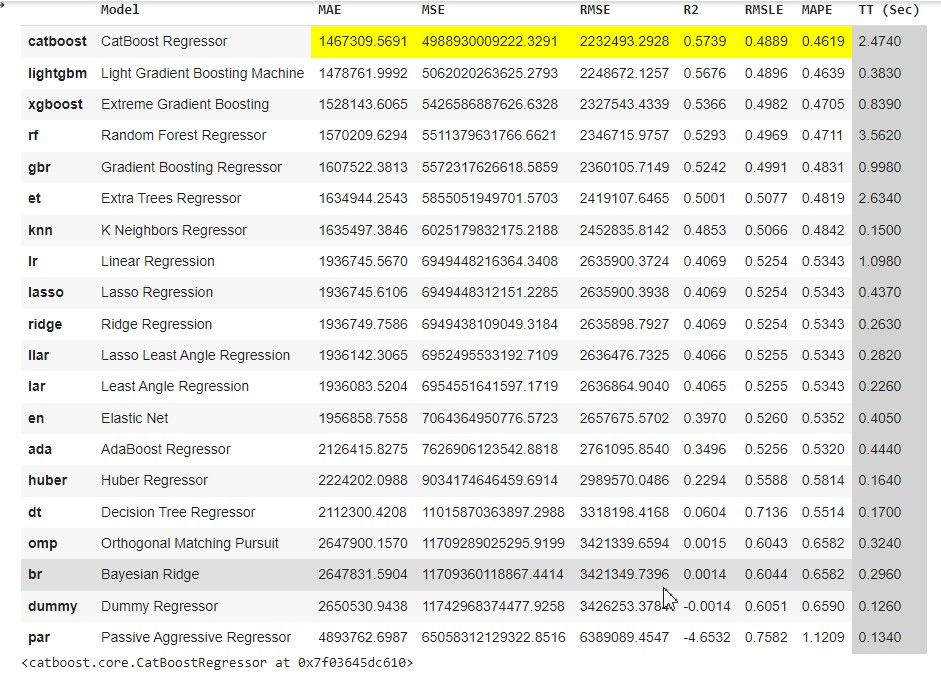

# standard data model selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=10)

In [ ]:
clf = CatBoostRegressor(loss_function='MAE')

In [ ]:
# display(y_train)
# cols = ['full_sq', 'life_sq', 'floor', 'state', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'full_all',]
# test = test0.merge(macro, how='left', on='timestamp')
# test.select_dtypes(exclude=object)
# for c in cols:
#   test[c] = test[c].fillna(test[c].mode()[0])
#   test[c] = test[c].astype(int)
# # test.drop(['Unnamed: 0', "cut_sq",  'year'], axis=1)
# test = test.select_dtypes(exclude=[object])




In [ ]:
# display(test.info())
# display(X_train.info())
# cat_col = ['material', 'state', 'sub_area']
# for c in cat_col:
#   test[c] = test[c].astype('category')

In [ ]:
train_dataset = Pool(data=X_train,
                     label=y_train,
                      cat_features=list(x.select_dtypes(include=['category']).columns),
                     )

eval_dataset = Pool(data=X_val,
                    label=y_val,
                     cat_features=list(x.select_dtypes(include=['category']).columns),
                     )

# clf.fit(train_dataset,
#           use_best_model=True,
#           verbose = 0,
#           eval_set=eval_dataset,)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
cat_regress = CatBoostRegressor(verbose=1,
                                cat_features=list(x.select_dtypes(include=['category']).columns),
                                loss_function='MAE',
                                l2_leaf_reg=12,
                                eval_metric='MAE', )

In [ ]:
cat_regress.fit(x, y,
                cat_features=list(x.select_dtypes(include=['category']).columns),
                                  use_best_model=True,
                                        eval_set=eval_dataset,)

0:	learn: 2560911.9240390	test: 2571911.2264701	best: 2571911.2264701 (0)	total: 68.8ms	remaining: 1m 8s
1:	learn: 2525505.7675130	test: 2534288.0368546	best: 2534288.0368546 (1)	total: 85.7ms	remaining: 42.8s
2:	learn: 2488544.9123239	test: 2497355.0815811	best: 2497355.0815811 (2)	total: 106ms	remaining: 35.2s
3:	learn: 2453400.5339570	test: 2460631.6487750	best: 2460631.6487750 (3)	total: 120ms	remaining: 29.8s
4:	learn: 2420945.7831916	test: 2427075.8371008	best: 2427075.8371008 (4)	total: 132ms	remaining: 26.3s
5:	learn: 2386869.7159548	test: 2391768.6060124	best: 2391768.6060124 (5)	total: 146ms	remaining: 24.3s
6:	learn: 2355472.2045106	test: 2359062.1115991	best: 2359062.1115991 (6)	total: 162ms	remaining: 23s
7:	learn: 2327273.2948148	test: 2329921.1436902	best: 2329921.1436902 (7)	total: 179ms	remaining: 22.2s
8:	learn: 2300267.9702320	test: 2301169.3398728	best: 2301169.3398728 (8)	total: 194ms	remaining: 21.3s
9:	learn: 2273526.0868345	test: 2273201.9480672	best: 2273201.94

KeyboardInterrupt: ignored

In [ ]:
cat_regress.get_best_score()

In [ ]:
pred= cat_regress.predict(test)

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [ ]:
y_pred = clf.predict(Pool(data=test_norm,
                     ))

print(f"MAPE: {mape(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

In [ ]:
# y_pred

In [ ]:
# y_pred_restore = np.exp(y_pred)

In [ ]:
sub = test.copy().drop(test.columns, axis=1)
sub['price_doc'] = pred
sub = sub.reset_index()

sub.drop(['index'], axis=1, inplace=True)
sub.index.name = 'id'
display(sub)
sub.to_csv('submission.csv')